# АНАЛИЗ БИЗНЕЗ ПОКАЗАТЕЛЕЙ РАЗВЛЕКАТЕЛЬНОГО ПРИЛОЖЕНИЯ Procrastinate Pro+

  *ОПИСАНИЕ И ЦЕЛЬ ПРОЕКТА*

Развлекательное приложения Procrastinate Pro+ несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

  *ЗАДАЧА*

Разобраться в причинах и помочь компании выйти в плюс.

  *ОПИСАНИЕ ДАННЫХ*

В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

*Структура visits_info_short.csv:*

* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

*Структура orders_info_short.csv:*

* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

*Структура costs_info_short.csv:*

* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

 *ШАГИ ПРОЕКТА*

1. Загрузка данных и подготовка их к анализу.
2. Исследовательский анализ данных.
3. Маркетинг.
4. Оценка окупаемости рекламы.
5. Выводы.


##  Загрузка данных и подготовка их к анализу

###  Изучение данных

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# загрузим данные и сохраним их в переменных
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
#выведим информацию о каждом датасете и выведем первые 5 столбцов:
visits.info()
visits.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.info()
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Во всех таблицах пропуски отсутсвуют. Названия столбцов необходимо причести к "хорошему" стилю. В столбцах Session Start, Session End - датасет visits; Event Dt - датасет orders; Dt - датасет costs; сохранены данне о времени. Тип данных в этих столбцах (object) и необходимо привети его в соотвествие.


###  Предоработка данных

Приведем названия столбцов к хорошему стилю.

In [6]:
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(" ", "_") 
visits.head(5)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [7]:
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(" ", "_")
orders.head(5)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
costs.columns = costs.columns.str.lower()
costs.head(5)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Все названия колонах в таблицах приведены в соотвествие с хорошим стилем.

Преобразуем данные о времени для дальнейших расчётов 

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Приверим датасеты на наличие дубликатов.


In [10]:
visits.duplicated().sum()

0

In [11]:
orders.duplicated().sum()

0

In [12]:
costs.duplicated().sum()

0

### Проведем оценку пользовательской активности приложения. 

Для дальнейших расчетов необходим выделить год, месяц, день и неделю начала сессии.


In [13]:
visits['session_year'] = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month
visits['session_date'] = visits['session_start'].dt.date
visits['session_week'] = visits['session_start'].dt.isocalendar().week

Посчитаем количество уникальных пользоваетлей в день

In [14]:
DAU = visits.groupby('session_date').agg({'user_id': 'nunique'}).mean()
print('Дневная аудитория', int(DAU))

Дневная аудитория 1684


Посчитаем количество уникальных пользоваетлей в неделю

In [15]:
WAU = visits.groupby('session_week').agg({'user_id': 'nunique'}).mean()
print('Недельная аудитория', int(WAU))

Недельная аудитория 8353


Посчитаем количество уникальных пользоваетлей в месяц

In [16]:
MAU = visits.groupby('session_month').agg({'user_id': 'nunique'}).mean()
print('Месячная аудитория', int(MAU))

Месячная аудитория 28989


In [17]:
# Посчитаем число сессий пользователя за месяц:
visits_per = visits.groupby(['session_year', 'session_month']).agg({'user_id': ['count', 'nunique']})
# Переименуем столбцы
visits_per.columns = ['n_session', 'n_users']


In [18]:
visits_per['visits_per_user'] = (visits_per['n_session'] / visits_per['n_users'])
visits_per

n_session  n_users  visits_per_user
session_year session_month                                     
2019         5                  45765    27111         1.688060
             6                  44623    26042         1.713501
             7                  47970    26672         1.798515
             8                  55996    31064         1.802601
             9                  56628    31871         1.776788
             10                 58919    31175         1.889944

Число пользователей растет от месяца к месяцу. Но количество сессий в месяц очень маленькое для развлекательного приложения.

Определим среднюю продолжительность сессии:

In [19]:
visits['session_duration_sec'] = (visits['session_end'] - visits['session_start']).dt.seconds
print(f'Среднее значение: {visits.session_duration_sec.mean()}')
print(f'Медианное значение: {visits.session_duration_sec.median()}')



Среднее значение: 1800.0908677287264
Медианное значение: 1244.0


Построим гистограмму распределения средней продолжительности сессии.

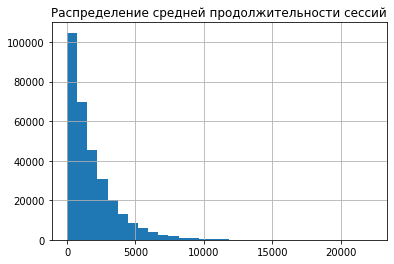

In [20]:
visits['session_duration_sec'].hist(bins=30)
plt.title('Распределение средней продолжительности сессий')
plt.show()

Секунды, проведённые пользователями в приложении, имеют экспоненциальное распределение с пиком в районе нуля. И это нормально — в любом цифровом сервисе очень многие сессии заканчиваются техническими ошибками.
Все «ошибочные» сессии на графике попадают в корзину, которая ближе всего к нулю, а успешные — «размазываются» в длинный хвост. На самом его кончике собираются аномально длинные сессии пользователей, которым ну очень понравился продукт. Среднее значение пользовательской активности около 30 минут. При этом медианной около 21 минуты.



## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.



### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [21]:
#  Составим профили пользователей используя функцию get_profiles
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


В задании указано что данные предоставленны с 1 мая по 27 октября 2019 года, а пользователи должны окупаться не позднее, чем через 2 недели после привлечения.
На календаре 1 ноября 2019 года.

In [22]:
# Поэтому установим горизонт анализа в 14 дней:
analysis_horizon = 14
# Момент анализа:
observation_date = profiles['dt'].max()
observation_date

datetime.date(2019, 10, 27)

In [23]:
# минимальная дата привлечения
min_analysis_date = profiles['dt'].min()
print('Минимальная дата привлечения', min_analysis_date)


Минимальная дата привлечения 2019-05-01


In [24]:
# максимальная дата привлечения
max_analysis_date =  observation_date 
print('Максимальная дата привлечения', max_analysis_date)

Максимальная дата привлечения 2019-10-27


### Анализ пользователей по странам

Построим сводную таблицу из profiles с группировкой по странам и выясним на какую страну приходится больше всего платящих пользователей. То есть тех у которых в колонке 'payer' стоит True 

In [25]:
region = profiles.pivot_table(index='region',
                              columns='payer',
                              values='user_id',
                              aggfunc='count')\
.rename(columns={True: 'payer', False: 'not_payer'})\
.sort_values(by='payer', ascending=False)

# Расчитаем долю платящих пользователей для каждого региона:
region['payer_user_share'] = (region['payer']/(region['payer'] + region['not_payer']) * 100).round(2)

In [26]:
region

payer,not_payer,payer,payer_user_share
region,,,
United States,93100,6902,6.90
UK,16875,700,3.98
France,16787,663,3.80
Germany,14365,616,4.11


Можно сделать вывод о том что лидер по платящм пользователям United States, доля платящих здесь 6,9 %. По количеству платящих на втором месте UK, но в расчте на доли получается, что Германия где количество платящих меньше опережает France и UK.

### Анализ пользователей по устройствам

Построим сводную таблицу из profiles с группировкой по device и выясним какие  устройства больше предпочитают платящие пользователи. 

In [27]:
device = profiles.pivot_table(index='device',
                              columns='payer',
                              values='user_id',
                              aggfunc='count')\
.rename(columns={True: 'payer', False: 'not_payer'})\
.sort_values(by='payer', ascending=False)

# Расчитаем долю платящих пользователей для каждого устройства:
device['device_user_share'] = (device['payer']/(device['payer'] + device['not_payer']) * 100).round(2)
device


payer,not_payer,payer,device_user_share
device,,,
iPhone,51097,3382,6.21
Android,32982,2050,5.85
Mac,28130,1912,6.36
PC,28918,1537,5.05


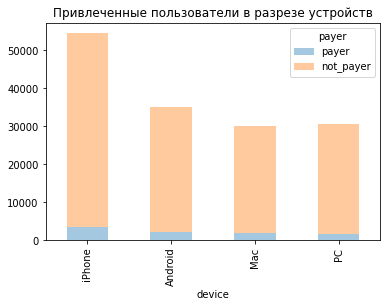

In [28]:
# Построим диаграмму для наглядности.
device[['payer', 'not_payer']].plot(kind='bar', stacked=True, alpha=0.4)
plt.title('Привлеченные пользователи в разрезе устройств')
plt.show()

Больше всего платящих пользователей среди любителей iPhone и Mac, у них доля больше 6 %.

### Анализ пользователей по каналам привлечения

Построим сводную таблицу из profiles с группировкой по channel и выясним, из каких каналов пришло больше всего платящих пользователей. 

In [29]:
channel = profiles.pivot_table(index='channel',
                              columns='payer',
                              values='user_id',
                              aggfunc='count')\
.rename(columns={True: 'payer', False: 'not_payer'})\
.sort_values(by='payer', ascending=False)

# Расчитаем долю платящих пользователей для каждого устройства:
channel['channel_user_share'] = (channel['payer']/(channel['payer'] + channel['not_payer']) * 100).round(2)
channel.sort_values(by='channel_user_share', ascending=False)

payer,not_payer,payer,channel_user_share
channel,,,
FaceBoom,25587,3557,12.20
AdNonSense,3440,440,11.34
lambdaMediaAds,1924,225,10.47
TipTop,17683,1878,9.60
RocketSuperAds,4096,352,7.91
WahooNetBanner,8100,453,5.30
YRabbit,4147,165,3.83
MediaTornado,4208,156,3.57
LeapBob,8291,262,3.06


Построим диаграмму для наглядности.

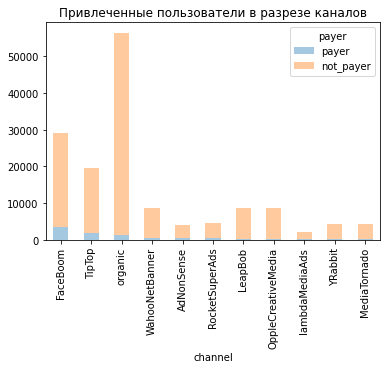

In [30]:
channel[['payer', 'not_payer']].plot(kind='bar', stacked=True, alpha=0.4)
plt.title('Привлеченные пользователи в разрезе каналов')
plt.show()


Больше всего пользователей пришло из канала organic. На втором месте FaceBoom за ним TipTop.
Но количество платящих больше в FaceBoom, AdNonSense, и TipTop. Можно отметить так же lambdaMediaAds. Конверсия у него не плохая, но количество привлеченных клиентов заметно ниже чем у трех других. 

Из проведенного анализа можно сделать следующие выводы:
1. Больше всего привлеченных клиентов приходится на  США. Конверсия их выше чем у остальных.
2. Так же платящие пользователи предпочитают iPhone и Mac. Чаще всего однако в приложение заходят с мобильного утсройства.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.



### Посчитаем общую сумму расходов на маркетинг.

In [31]:
# Данные о тратах на рекламу содержатся в таблице costs.
# Посчитаем общую сумму:
total_sum = costs['costs'].sum().round()
print('Общая сумма трат на рекламу:', total_sum )

Общая сумма трат на рекламу: 105497.0


### Выясним как траты распределены по рекламным источникам

Построим сводную таблицу по источникам, и посчитаем сколько денег было потрачено на каждый. Сохраним ее в переменной costs_pivot.

In [32]:
costs_pivot = costs.pivot_table(index='channel',values='costs',aggfunc='sum')
costs_pivot

,costs
channel,
AdNonSense,3911.25
FaceBoom,32445.60
LeapBob,1797.60
MediaTornado,954.48
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
TipTop,54751.30
WahooNetBanner,5151.00
YRabbit,944.22


In [33]:
# Отсортируем по сумме затрат^
costs_pivot.sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [34]:
# Выведим еще процент затрат каждого канала от общей суммы.

costs_pivot['costs_share'] = costs_pivot['costs'] / total_sum * 100

costs_pivot.sort_values(by='costs_share', ascending=False)



,costs,costs_share
channel,,
TipTop,54751.30,51.898443
FaceBoom,32445.60,30.754998
WahooNetBanner,5151.00,4.882603
AdNonSense,3911.25,3.707451
OppleCreativeMedia,2151.25,2.039158
RocketSuperAds,1833.00,1.737490
LeapBob,1797.60,1.703935
lambdaMediaAds,1557.60,1.476440
MediaTornado,954.48,0.904746


Тройка лидеров по затратам на рекламу: TipTop, FaceBoom, WahooNetBanner. При этом на канал TipTop тратится больше половины всего бюджета.

### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) 

In [35]:
# Выделим из даты номер недели:
costs['week_number'] = costs['dt'].astype('datetime64').dt.isocalendar().week
# Выделим из даты номер месяца:
costs['month_number'] = costs['dt'].astype('datetime64').dt.month
costs

,dt,channel,costs,week_number,month_number
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,43,10
1796,2019-10-24,lambdaMediaAds,6.4,43,10
1797,2019-10-25,lambdaMediaAds,8.8,43,10
1798,2019-10-26,lambdaMediaAds,8.8,43,10


In [36]:
#Сводная таблица трат по неделям
costs_week = costs.pivot_table(index='week_number',
            columns='channel',
            values='costs',
            aggfunc='sum')



In [37]:
#Сводная таблица трат по месяцам
costs_month = costs.pivot_table(index='month_number',
            columns='channel',
            values='costs',
            aggfunc='sum')


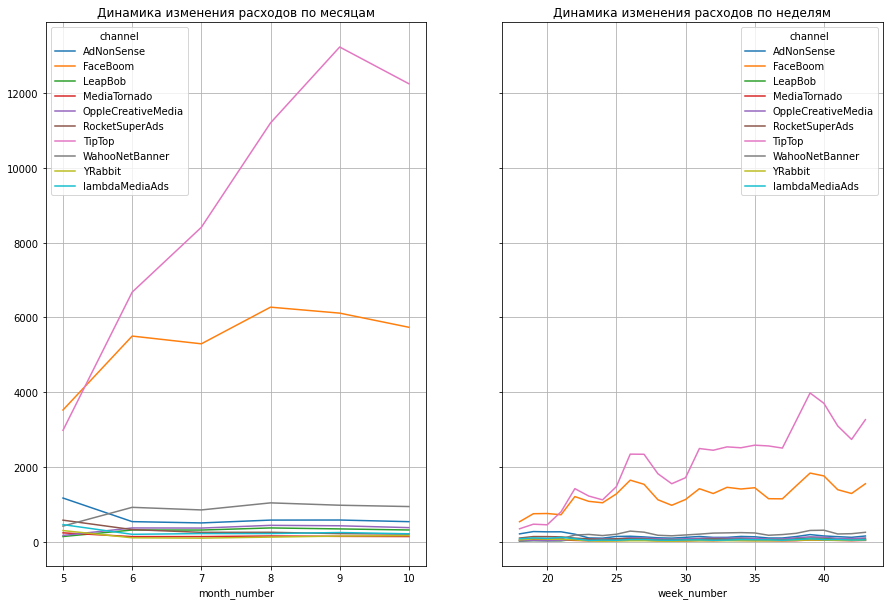

In [38]:
#Сводная таблица трат по месяцам
costs_month = costs.pivot_table(index='month_number',
            columns='channel',
            values='costs',
            aggfunc='sum')


#Сводная таблица трат по неделям
costs_week = costs.pivot_table(index='week_number',
            columns='channel',
            values='costs',
            aggfunc='sum')


plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
costs_month.plot(grid=True, ax=ax1)
plt.title('Динамика изменения расходов по месяцам')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs_week.plot(grid=True,ax=ax2)
plt.title('Динамика изменения расходов по неделям')
  
    
plt.show()

Для каналов FaceBoom,  и Tip Top наблюдается рост затрат как в месячном так и в недельном разрезе. Максимальные затраты в канал Tip Top  были в сенябре в канал FaceBoom в августе. Остальные каналы имеют почти линейную зависимость. 

### Расчитаем САС 

Расчитаем средний (CAC) привлечение одного пользователя  из каждого источника. Источник organic исключим так как стоимость привлечения в нем равна нулю.  Используем профили пользователей.

In [39]:
profiles.query('channel != "organic"')\
.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')\
.rename(columns={'acquisition_cost': 'cac'})\
.sort_values(by='cac', ascending=False)



,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Как и ожидалось самый затратный это канал TipTop. На него тратится больше всего денег на рекламу , и его пользователи в привлечении самые дорогие. 

Проанализировав расходов на рекламу обнаружили два самых затратных канала Tip Top и FaceBoom. Расхода на эти каналы растутот месяца к месяцу, тогда как в других каналах расходя на рекламу не меняются. Самый дорогой канал является Tip Top. Затраты на привлечение одного пользователя там больше чем в два раза превосходят второй популярный канал FaceBoom. А так же на Tip Top приходится 51 % всех рекламных расходов.	

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Для анализа окупаемости будем использовать функции для расчёта LTV и ROI, функции для сглаживания фрейма. В анализ не будем включать данные канала organic. Так как затраты на рекламу там равны нулю.

In [40]:
profiles = profiles.query('channel != "organic"')

In [41]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [42]:
# рассчитываем LTV и ROI:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon)


In [43]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

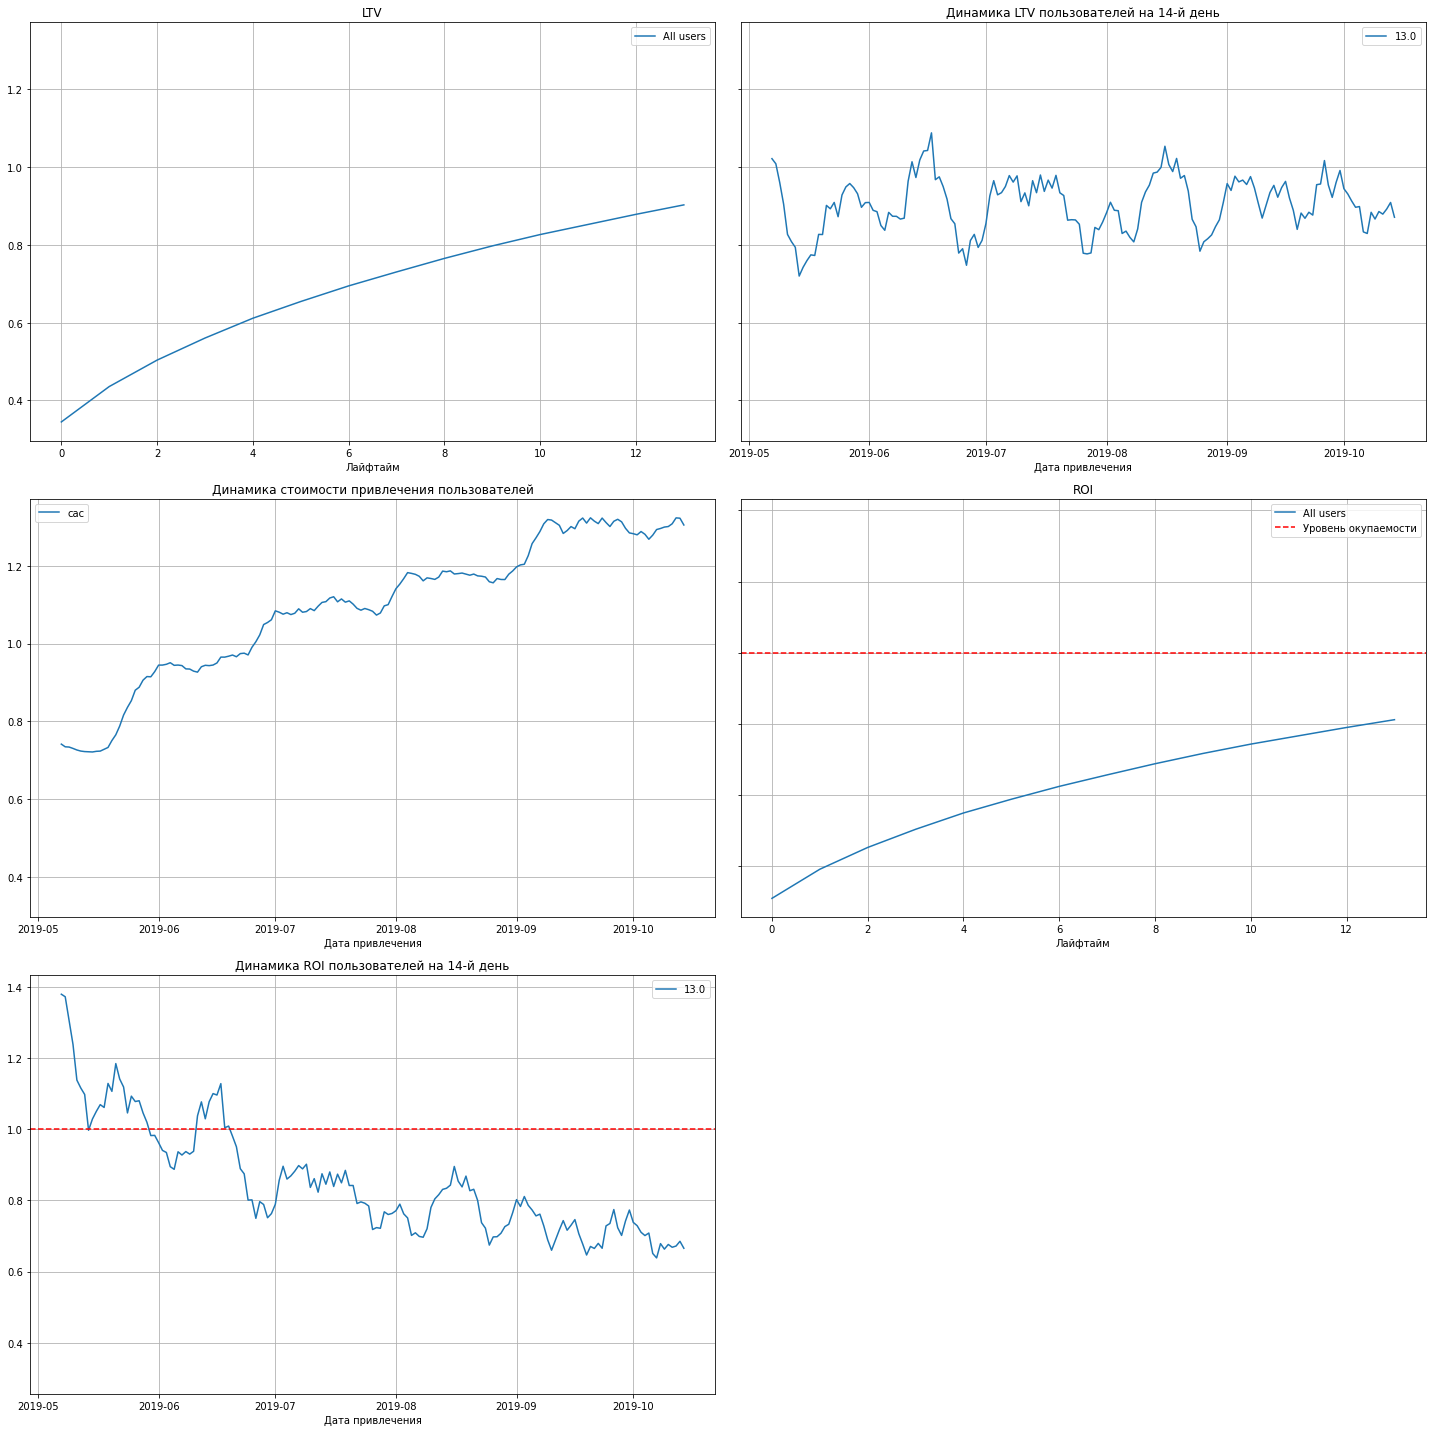

In [44]:
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon)

Судя по графикам окупаемость на 14 дней отсутсвует. САС растет, значит затраты на рекламу тоже растут.  LTV  достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

### Проверим конверсию и динамику её изменения

In [45]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [46]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

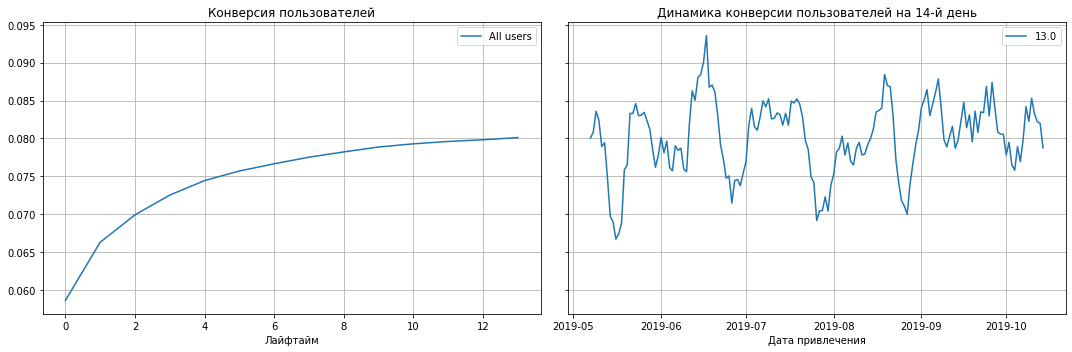

In [47]:
# смотрим конверсию и строим ее график

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 

In [48]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [49]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 


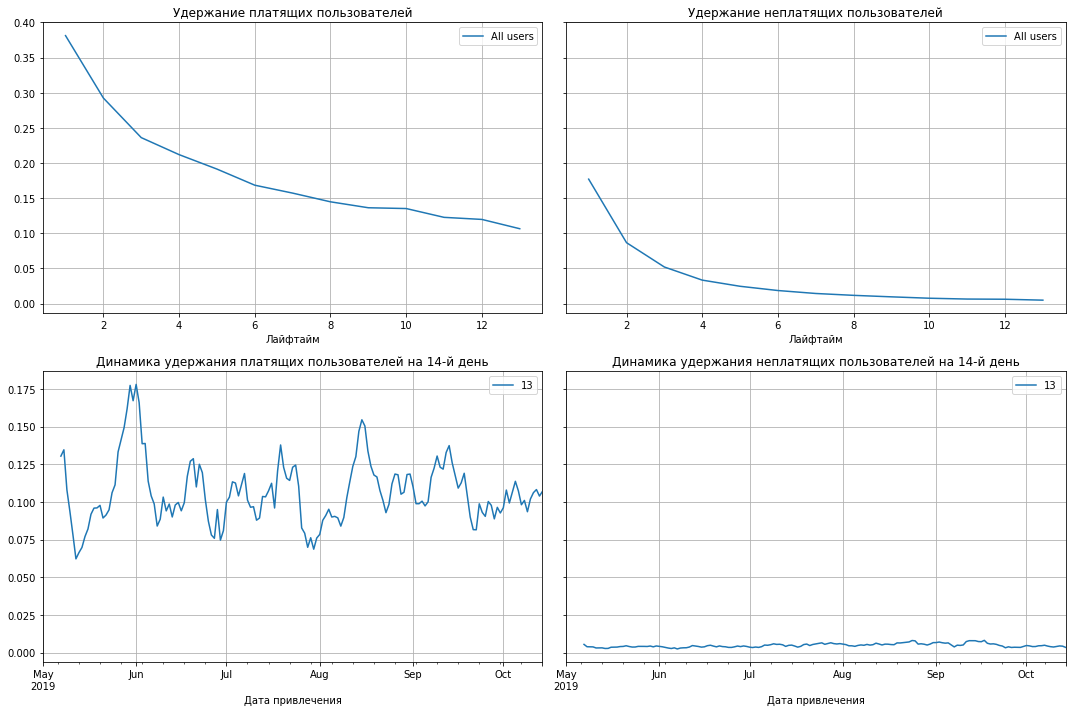

In [50]:
# смотрим удержание и строим график

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon)

plot_retention(retention_grouped, retention_history, analysis_horizon) 


Удержание как платящих так и не платящих пользователей стремительно падает. В конце мая начале июня наблюбается рост удержания, потом опять идет спад.

Изучим графики конверсии и удержания в разрезе стран, устройстви каналов привлечения.

#### Посмотрим графики конверсии и удержания пользвателе с разбивкой по странам

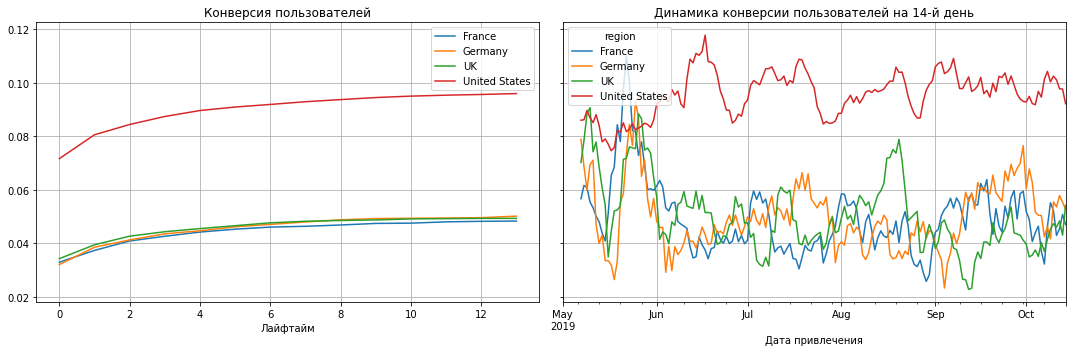

In [51]:
# Конверсия
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

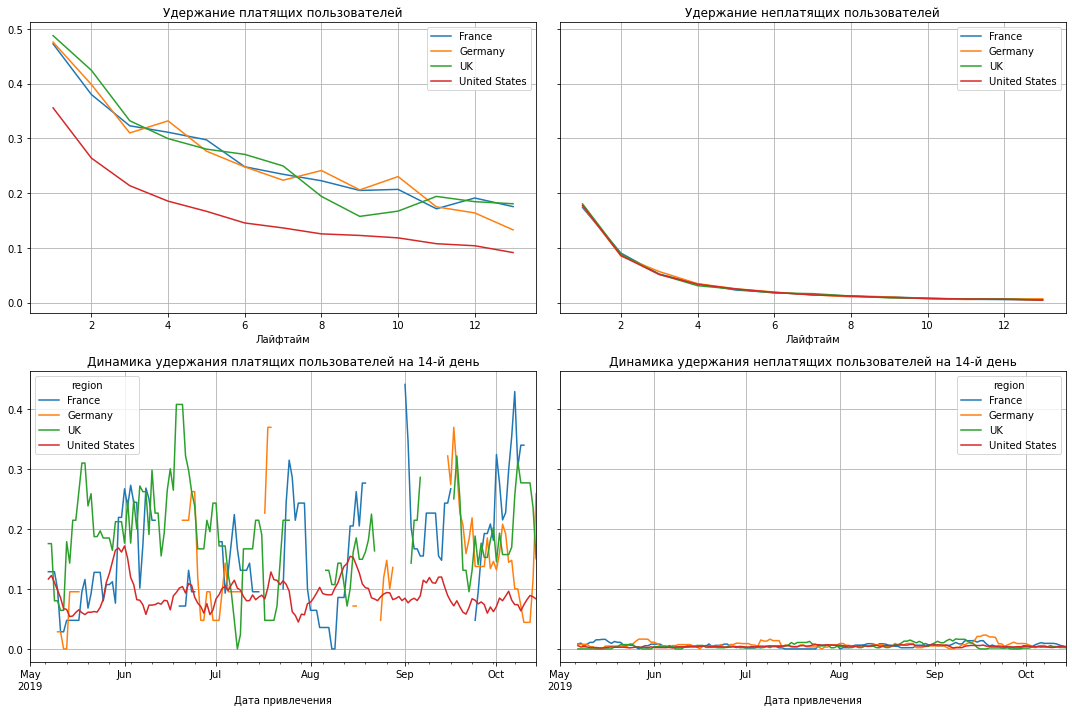

In [52]:
# Удержание
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Конверсия пользователе США высокая. Но удерживаются платящие пользователей США хуже остальных. 

#### Посмотрим графики конверсии и удержания пользвателе с разбивкой по устройствам

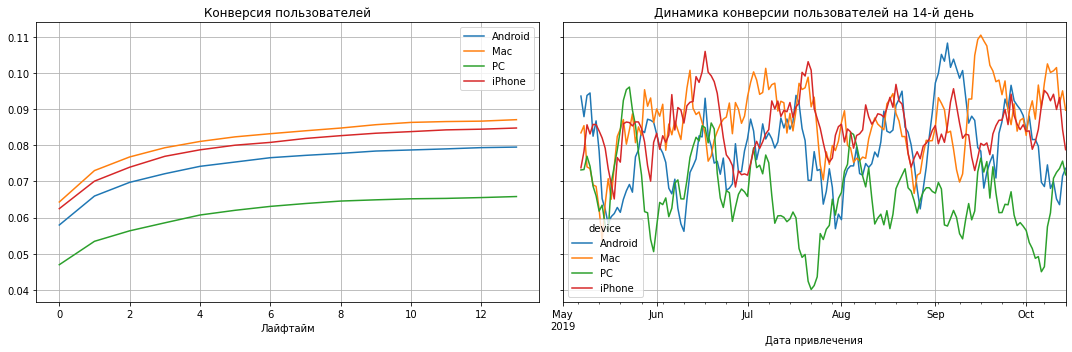

In [53]:
# Конверсия
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 


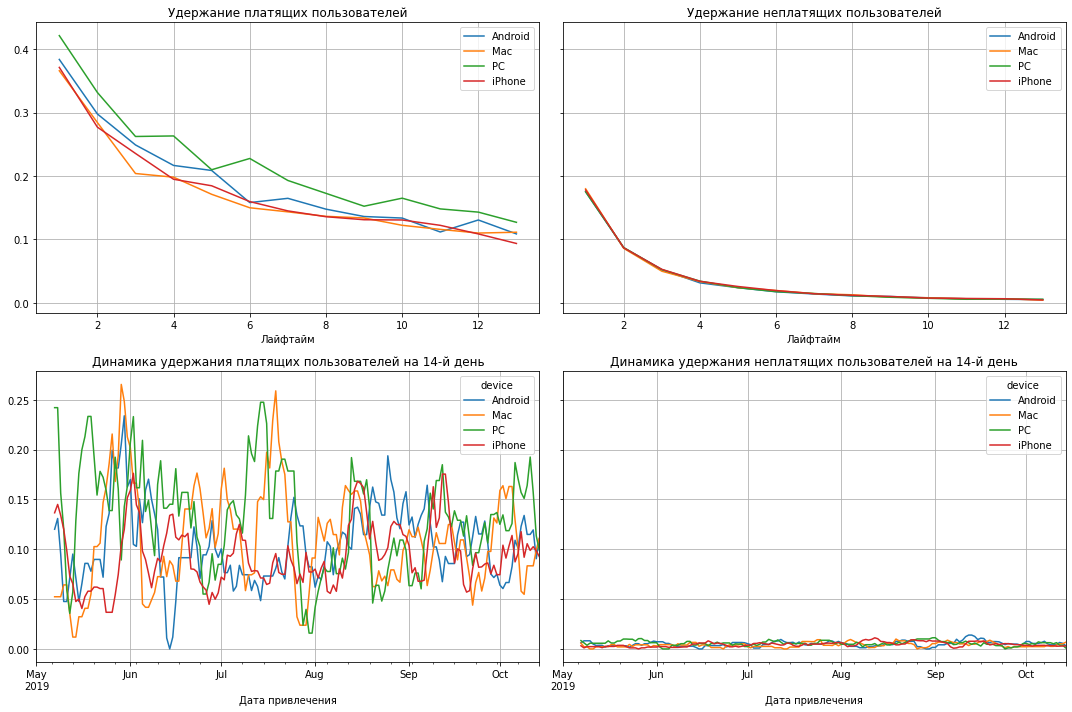

In [54]:
# Удержание

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

В разрезе устройств самая высока конверсия пользователей Мас и iPhonе. Но удержание платящих пользователей  на этих утройствах ниже чем у пользователей РС.

#### Посмотрим графики конверсии и удержания пользвателе с разбивкой по каналам

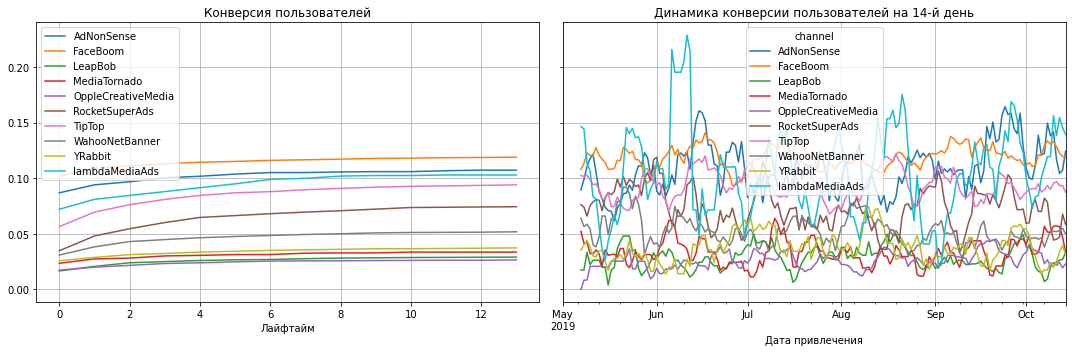

In [55]:
# Конверсия

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 

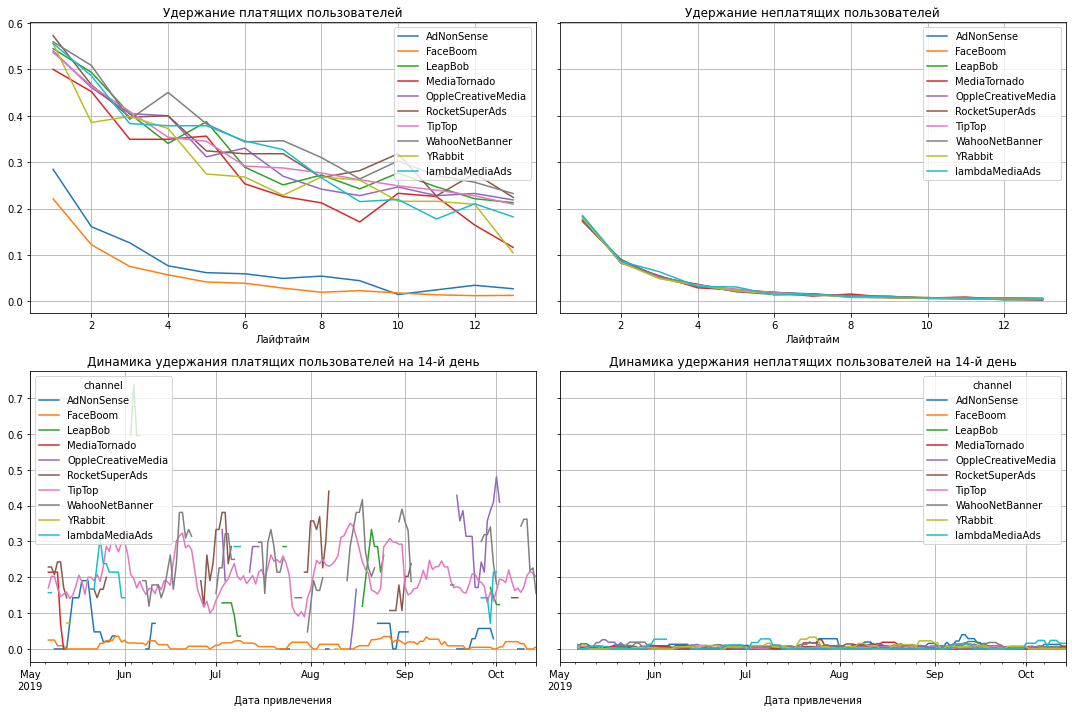

In [56]:
# Удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Лучше всего конвертируются пользователи из каналов FaceBoom, TipTop.
При этом удержание платящих пользователей их самая низкая.

Напришивается общий вывод  что клиенты дающие большую конверсию, потом хуже всего удерживаются.

### Окупаемость рекламы с разбивкой по устройствам

Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI и проанализируем их.

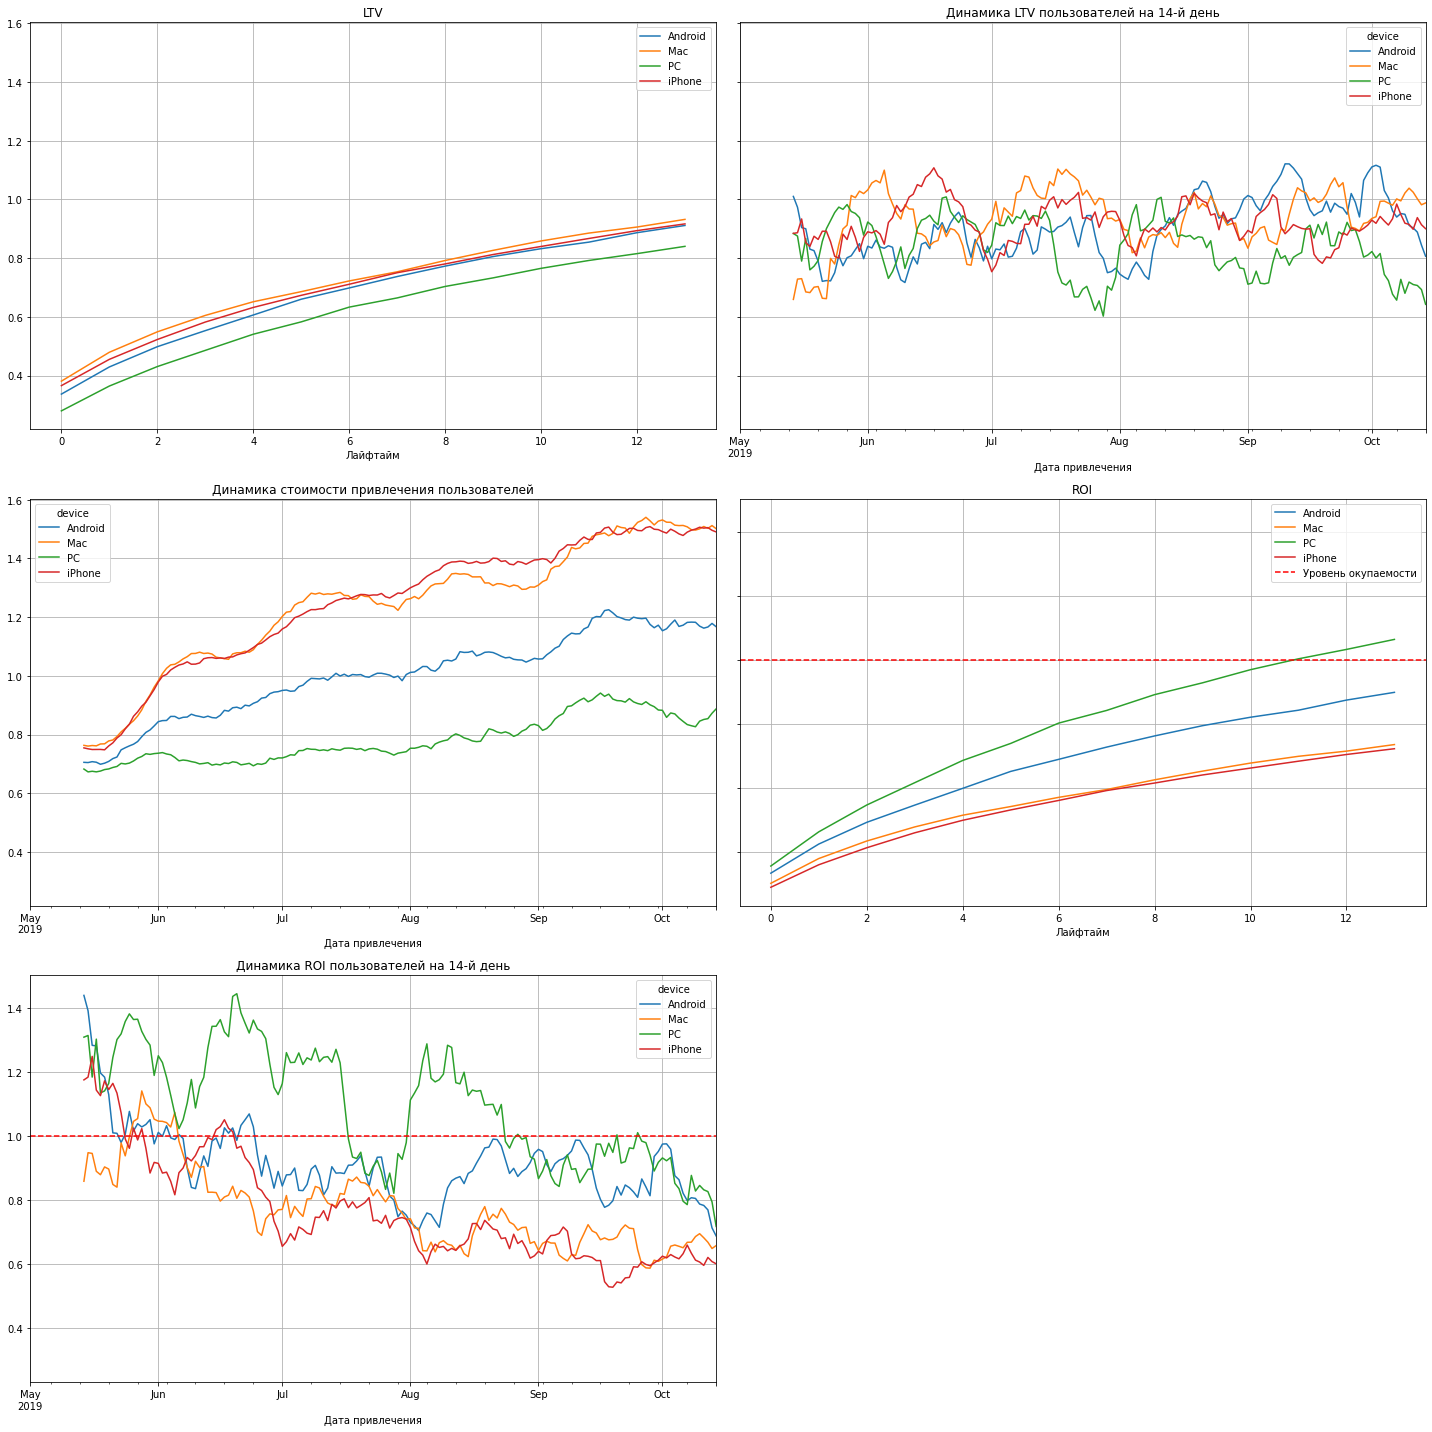

In [57]:
# смотрим окупаемость с разбивкой по устройтсвам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Пользователи PC окупают рекламу где то на 11 день. Android стремиться к окупаемости но пока не дотягивает, а вот пользователи Mac и iPhone не окупаются совсем.
Хотя показатель LTV и у Mac и iPhone выше, но и привлечение данных клиентов тоже обходится значительно дороже.

### Окупаемость рекламы с разбивкой по странам.

Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по странам и проанализируем их.

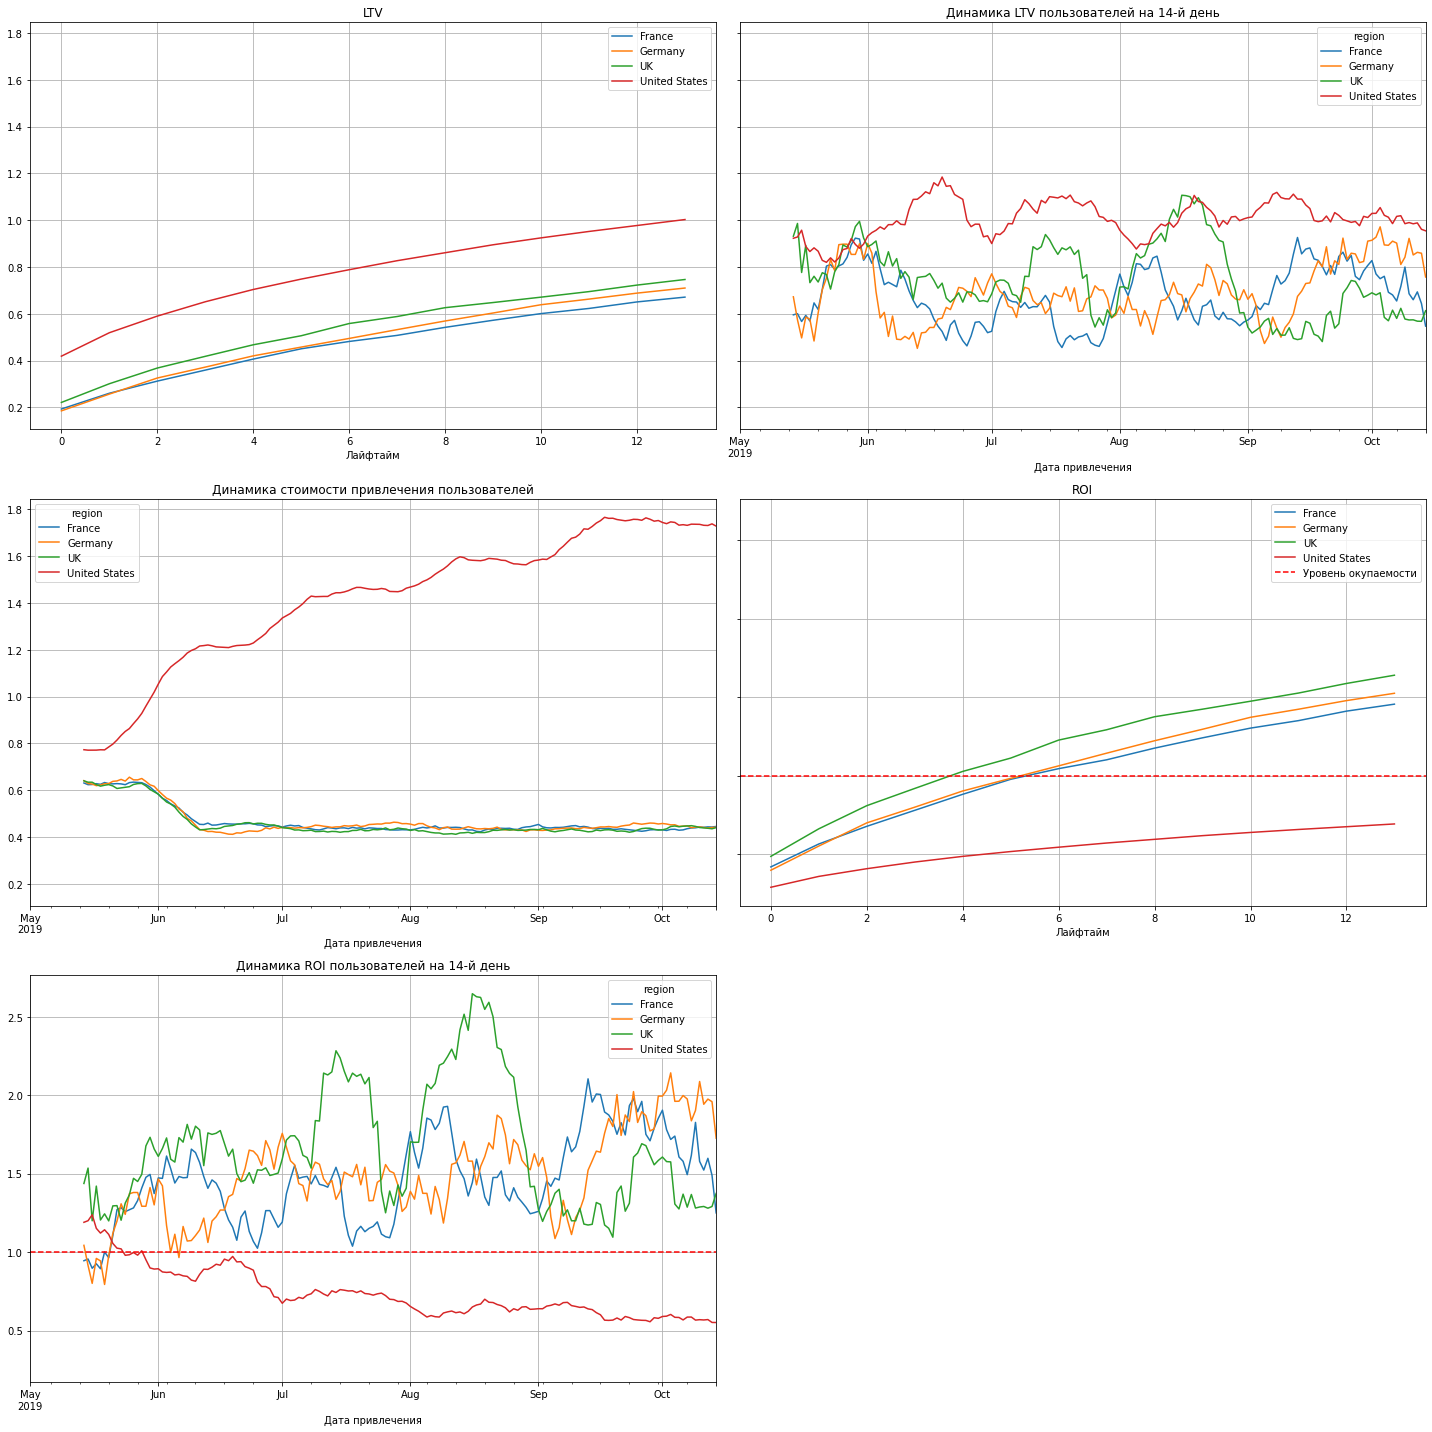

In [58]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Картина проясняется. США, которая лидер по количеству привлеченных пользователей совсем не окупается. И затраты на рекламу там растут. Тогда как затраты на рекламу в Европе и UK не меняются, окупаемость этих пользователей на лицо.

### Окупаемость рекламы с разбивкой по каналам привлечения 

Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по странам и проанализируем их.

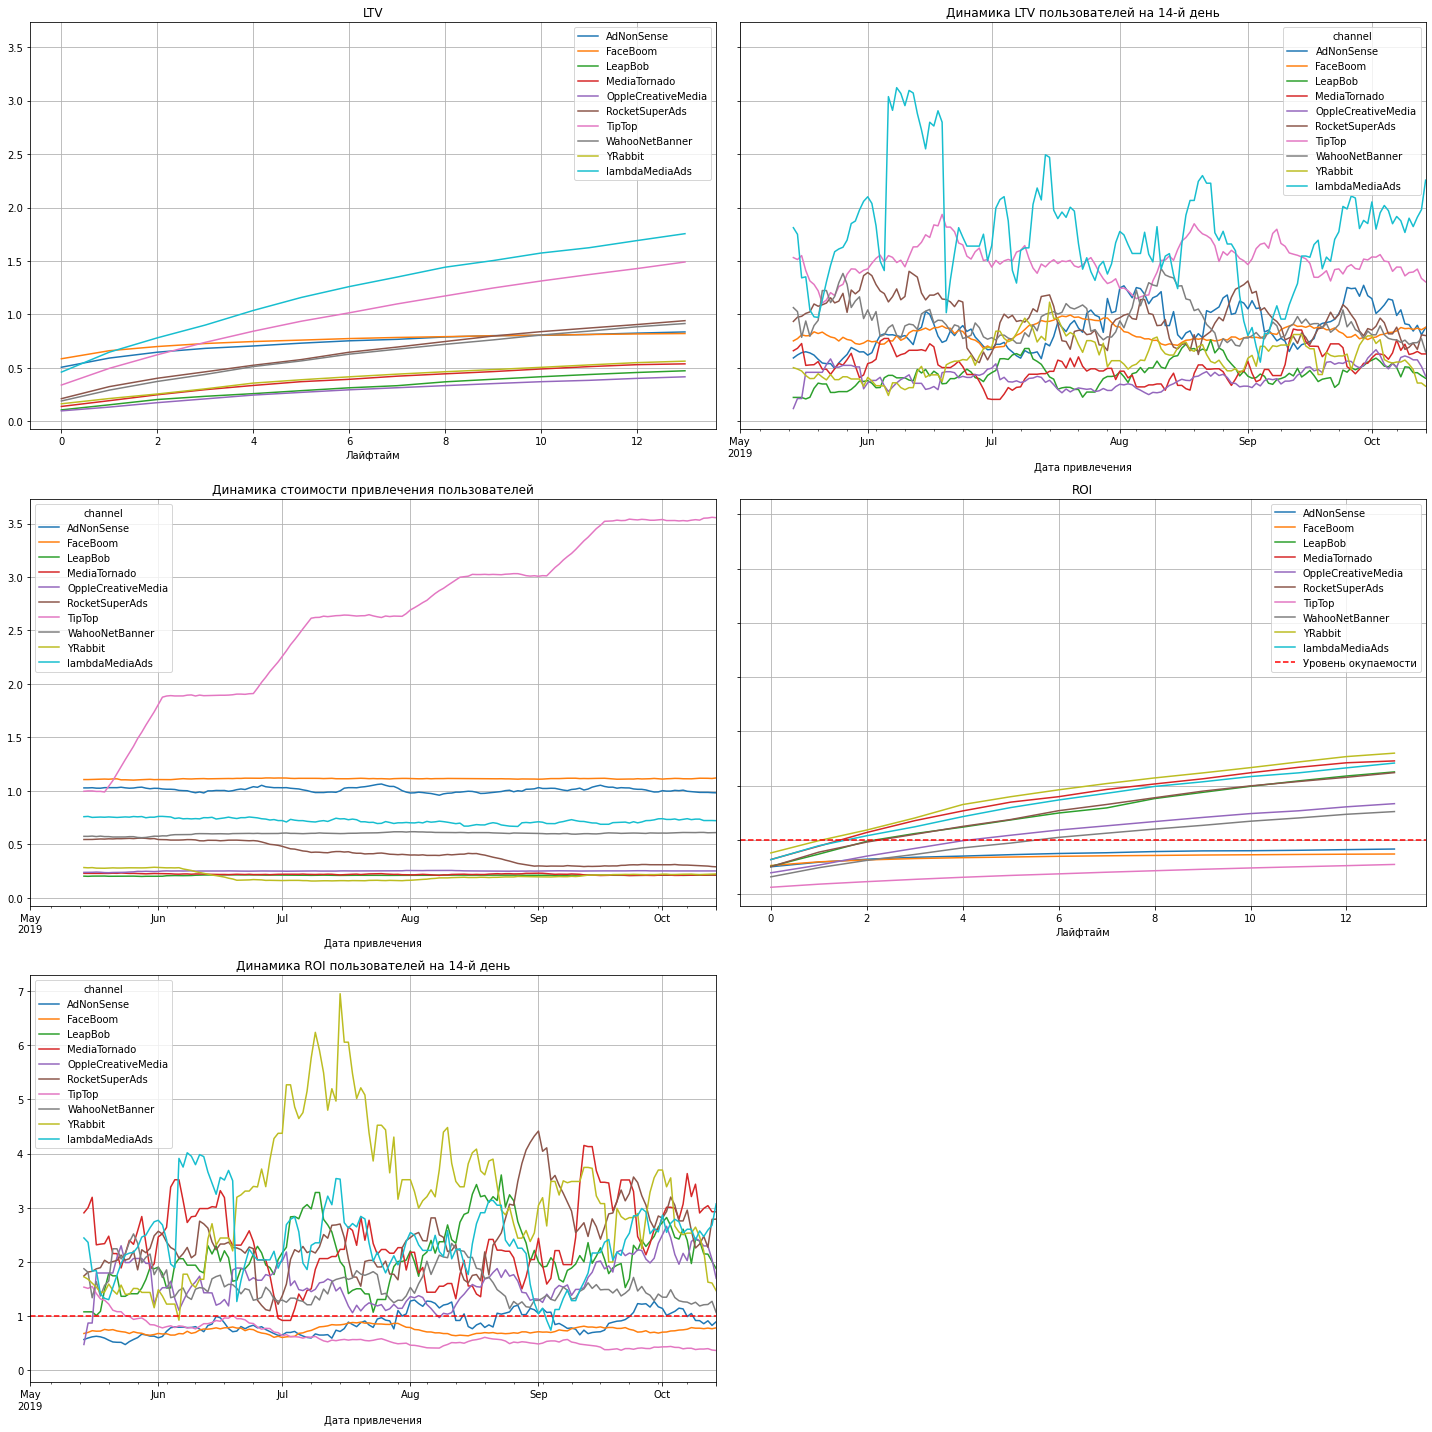

In [59]:
# смотрим окупаемость по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Взглянем на распределение затрат по каналам для США и для Европы отдельно.

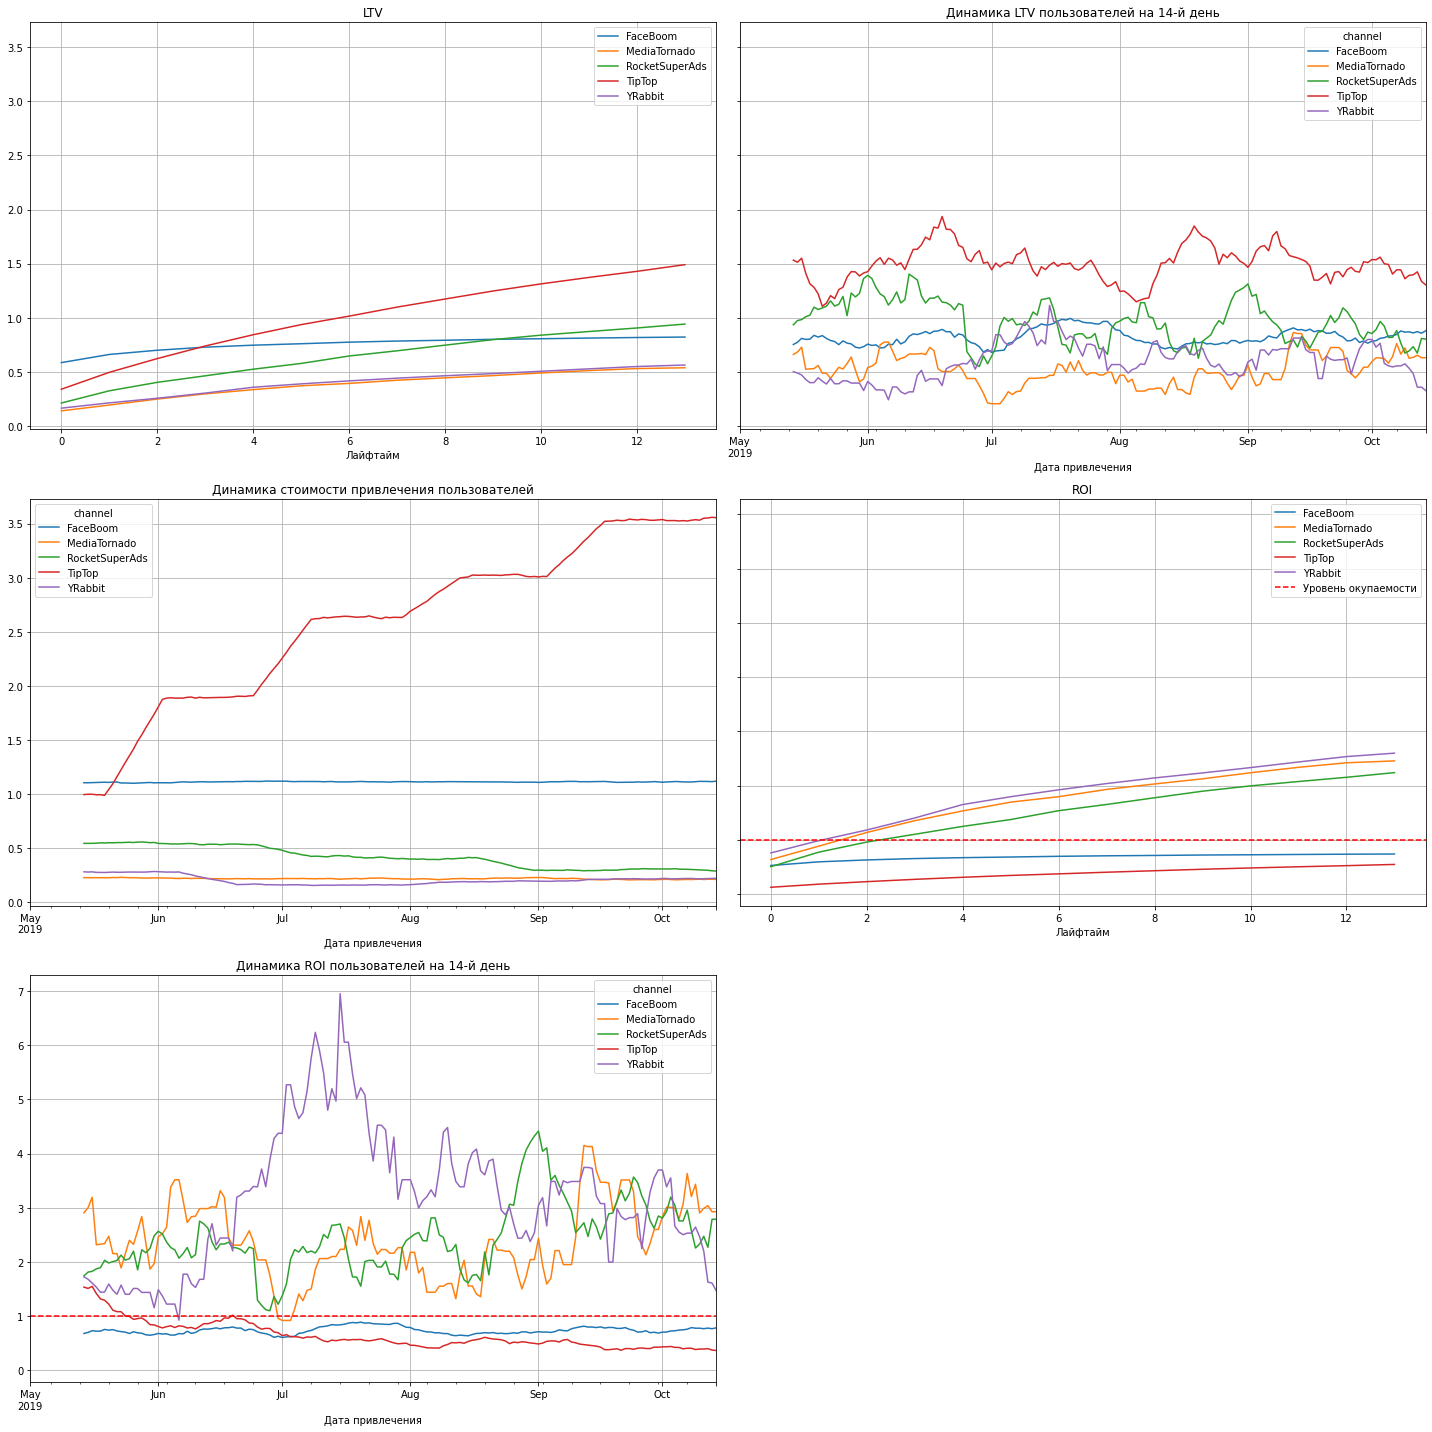

In [60]:
# распределение затрат по каналам для США
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region == "United States"'), orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Затраты В США на канал TipTop растут. Окупаемости при этом нет. При этом у трех каналов (YRabbit, RocketSuperAds, MediaTornado) где САС остается постоянным окупаемость начинается уже со второго лайфтайма.

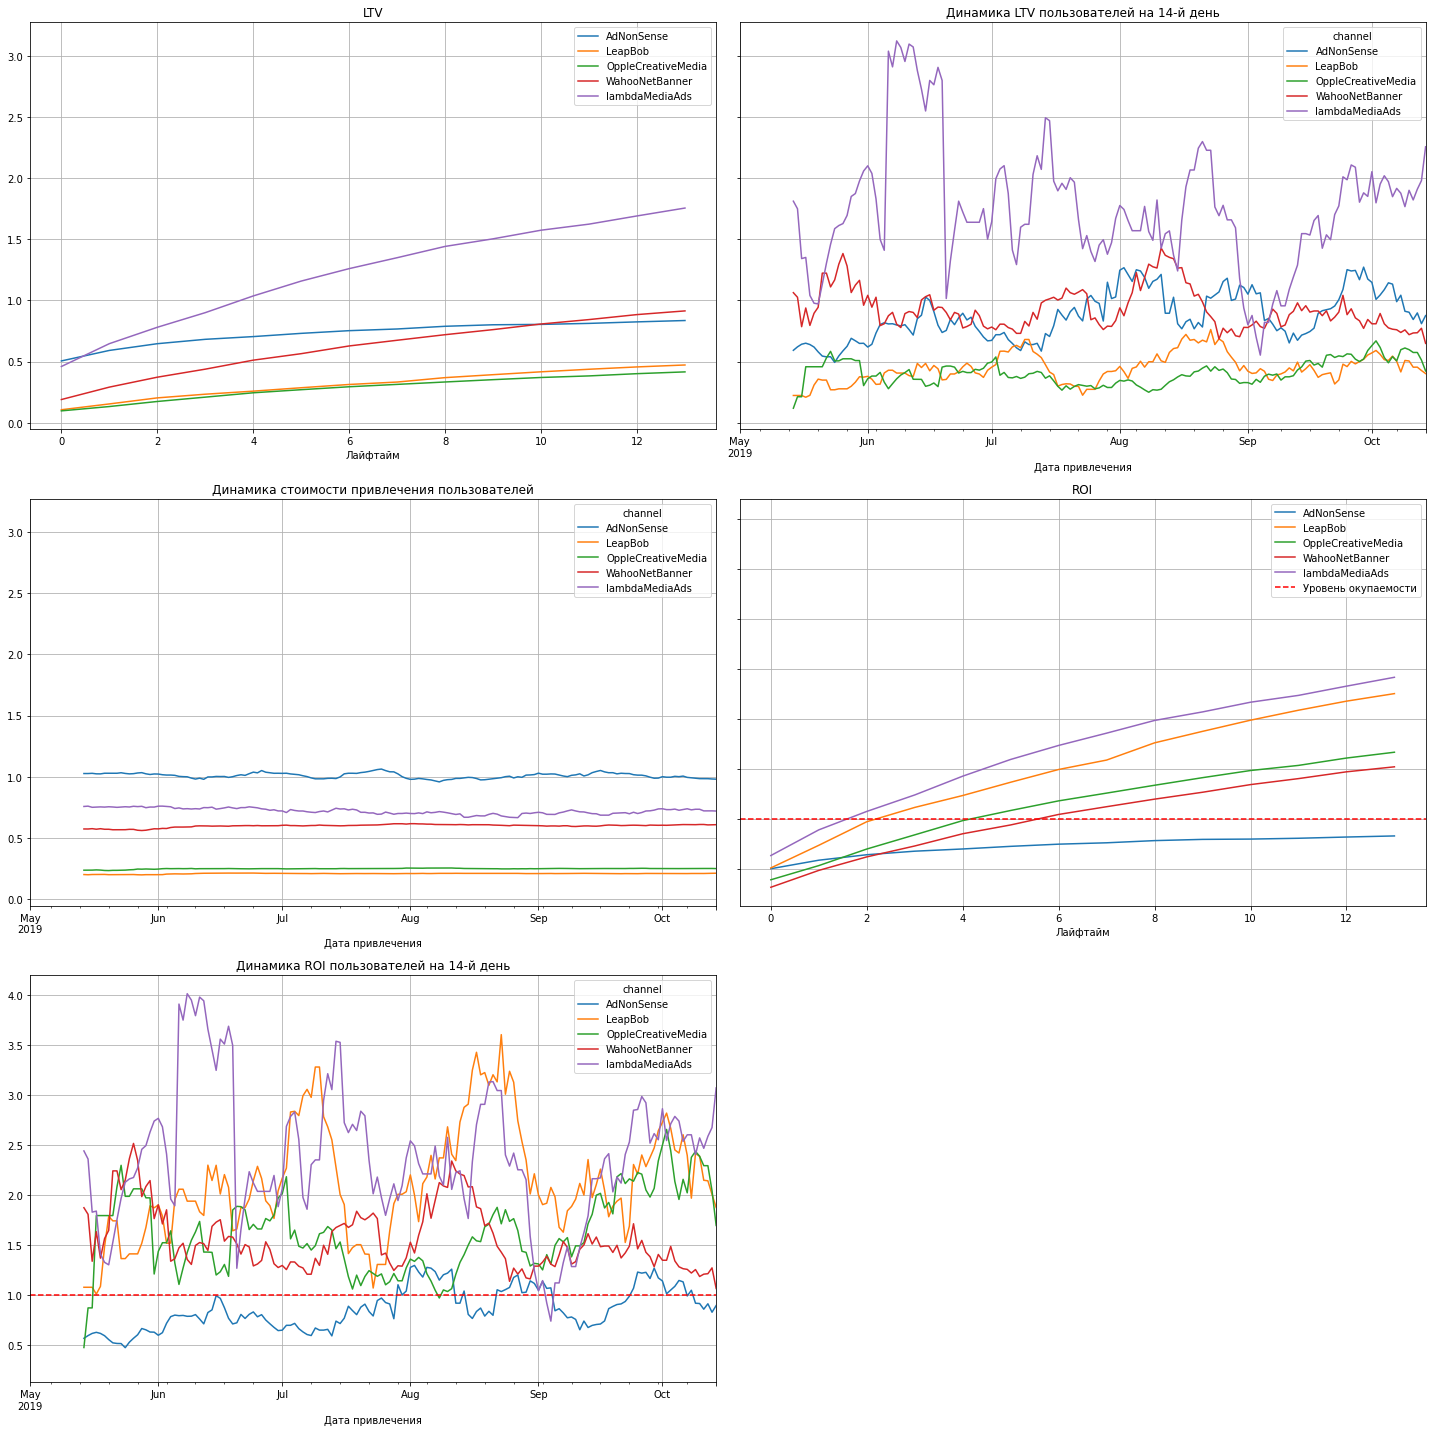

In [61]:
# распределение затрат по каналам для Европы
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region != "United States"'), orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

В Европе явный аутсайдер среди каналов AdNonSense. Окупаемости рекламы нет, при самоу высокой стоимости привлечения. Остальные каналы окупаются в интревале со второго по 6 лайфтаймы.

*Общая оценка окупаемости рекламы*

Самы большой рост затрат на рекламу наблюдается у какнала TipTop, но окупаемости нет. Окупаемость отсутвует у основных трех лидеров по затратам на рекламу TipTop, FaceBoom, AdNonSense. Наиболее перспективным можно назвать канал lambdaMediaAds. Стоимость привлечения ниже, и показатели пожизненной ценности клиенов высокие. 

В целом реклама направненная на привлечение кдлиентов не окупается. Это связяно с тем что самые дорогие каналы для привлечения где САС самый высокий не окупаются вовсе. 
Больше всего првлеченных пользователей из США  и конверсия их выше, но при этом там низкое удержание платящих пользователей.
В разрезе устройств самая низкая конверсия у РСБ но пользователи этих устройств хорошо удерживаются. Чего не скажешь про пользователей Мас и iPhonе. Удержание платящих пользователей  на этих утройствах ниже чем у пользователей РС. И пользователи Apple совем не окупаются при том что затраты на рекламу там самые высокие.



## Выводы

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

Проведя анализ данных о пользователях приложения Procrastinate Pro+ привлечённых с 1 мая по 27 октября 2019 года компанией сделали следующиий вывод.

- Реклама в США: дает самое большое число привлеченных пользователей; затраты на рекламу самые высокие и растут из месяца в месяц; окупаемость при этом отсутсвует.

- Самый дорогой канал привлечения TipTop находится в США. Суммарные затраты на рекламу в нем составляют около 51% от всего бюджета, и растуту каждый месяц.
- Канал FaceBoom,  и AdNonSense так же не окупаются. При том что стоимоть привлечения пользователей в них одна их самых высоких.
- Платящие пользователи самых дорогих каналов имеют самое низкое удержание.
- Если рассмотреть окупаемость по устройствам наблюдаем что пользователи PC окупают рекламу где то на 11 день. Android стремиться к окупаемости но пока не дотягивает, а вот пользователи Mac и iPhone не окупаются совсем. Хотя показатель LTV и у Mac и iPhone выше, но и привлечение данных клиентов тоже обходится значительно дороже.
 
 Чтобы повысить доходы компании рекомендуется следует перераспределить рекламный бюджет.
 
В США отказаться от рекламного канала TipTop и рассмотреть альтернативные варианты (YRabbit, RocketSuperAds, MediaTornado) где САС не высокий и остается постоянным, а окупаемость начинается уже со второго лайфтайма. 

В Европе стоит обратить внимание на каналы LeapBo, OppleCreativeMedia, lambdaMediaAds хорошая окупаемость при невысоком САС.
Эти каналы имеют доостаточное удеражине и окупаемость при невыском САС.

Возможно надо поработать над мобильной версией приложения, чтобы сделать ее более удобной для пользователей.